In [3]:
# Import the functions
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Dropout, MaxPool2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import os
from tensorflow.keras.models import load_model
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# Define the subsets with the train, validation and test images
train_path = 'E:\Docs\Academic\Ironhack\Projects\Project-Week-8-Travelling-With-Wheelchair\Images/train'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(train_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)
valid_path = 'E:\Docs\Academic\Ironhack\Projects\Project-Week-8-Travelling-With-Wheelchair\Images/valid'
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)

Found 1499 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [7]:
# Load the model
retrained_model = load_model('../resnet50model.h5')

In [39]:
# Retrain the model for two epochs
retrained_model.fit(train_batches, validation_data=valid_batches, epochs=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 150 steps, validate for 40 steps
Epoch 1/2
150/150 [==============================] - 8794s 59s/step - loss: 0.2936 - val_loss: 0.2792
Epoch 2/2
150/150 [==============================] - 8534s 57s/step - loss: 0.2814 - val_loss: 0.2704


In [8]:
# Save the model
retrained_model.save('E:\Docs\Academic\Ironhack\Projects\Project-Week-8-Travelling-With-Wheelchair/retrained_model.h5')

In [10]:
# Reload the model to see its predicting power
retrained_model = load_model('E:\Docs\Academic\Ironhack\Projects\Project-Week-8-Travelling-With-Wheelchair/retrained_model.h5')

In [11]:
# Define the test batch
test_path = 'E:\Docs\Academic\Ironhack\Projects\Project-Week-8-Travelling-With-Wheelchair\Images/test'
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)

Found 400 images belonging to 2 classes.


In [12]:
# Predict the classes of the test images
predictions = retrained_model.predict(test_batches)

In [13]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[110  90]
 [ 94 106]]


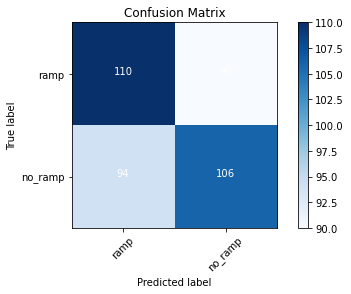

In [14]:
# Define the parameters and plot the confusion matrix
test_labels = test_batches.classes
cm = confusion_matrix(y_true=test_labels, y_pred=np.argmax(np.round(predictions), axis=1))
cm_plot_labels = ['ramp','no_ramp']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')